In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [31]:
train_dt = pd.read_csv('train.csv')
test_dt = pd.read_csv('test.csv')

In [32]:
train_dt.shape, test_dt.shape

((1460, 81), (1459, 80))

In [33]:
target = 'SalePrice'
y = train_dt['SalePrice']
train_dt = train_dt.drop(['SalePrice'],axis = 1)

In [34]:
train_dt.shape

(1460, 80)

In [35]:
all_dt = pd.concat([train_dt,test_dt],axis = 0)
all_dt.shape

(2919, 80)

In [36]:
all_dt.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [37]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
all_dt.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [38]:
pd.reset_option('^display.',silent = True)

In [39]:
cols_obj = (all_dt.dtypes == 'object')
obj_cols = list(cols_obj[cols_obj].index)
obj_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [40]:
for element in obj_cols:
    all_dt[element] = all_dt[element].fillna(all_dt[element].mode()[0])

In [41]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
all_dt.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      486
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [42]:
cols_int = (all_dt.dtypes == 'int')
int_cols = list(cols_int[cols_int].index)
int_cols

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [43]:
cols_float = (all_dt.dtypes == 'float')
float_cols = list(cols_float[cols_float].index)
float_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [44]:
pd.reset_option('^display.',silent = True)

In [45]:
for element in int_cols:
    all_dt[element] = all_dt[element].fillna(all_dt[element].mode()[0])
for element in float_cols:
    all_dt[element] = all_dt[element].fillna(all_dt[element].mode()[0])

In [46]:
pd.set_option('display.max_rows',None,'display.max_columns',None)
all_dt.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [47]:
train_df = all_dt.iloc[:1460,:]
test_df = all_dt.iloc[1460:,:]
train_df.shape , test_df.shape

((1460, 80), (1459, 80))

In [48]:
train_df = pd.concat([train_df,y],axis = 1)
train_df.shape

(1460, 81)

In [49]:
train_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  Grvl      Reg   
2        3          60       RL         68.0    11250   Pave  Grvl      IR1   
3        4          70       RL         60.0     9550   Pave  Grvl      IR1   
4        5          60       RL         84.0    14260   Pave  Grvl      IR1   
5        6          50       RL         85.0    14115   Pave  Grvl      IR1   
6        7          20       RL         75.0    10084   Pave  Grvl      Reg   
7        8          60       RL         60.0    10382   Pave  Grvl      IR1   
8        9          50       RM         51.0     6120   Pave  Grvl      Reg   
9       10         190       RL         50.0     7420   Pave  Grvl      Reg   
10      11          20       RL         70.0    11200   Pave  Grvl      Reg   
11      12          60       RL         85.0    11924   Pave  Grvl      IR1   
12      13          20       RL         60.0    12968   Pave  Grvl      IR2   
13      14          20       RL         91.0    10652   Pave  Grvl      IR1   
14      15          20       RL         60.0    10920   Pave  Grvl      IR1   
15      16          45       RM         51.0     6120   Pave  Grvl      Reg   
16      17          20       RL         60.0    11241   Pave  Grvl      IR1   
17      18          90       RL         72.0    10791   Pave  Grvl      Reg   
18      19          20       RL         66.0    13695   Pave  Grvl      Reg   
19      20          20       RL         70.0     7560   Pave  Grvl      Reg   
20      21          60       RL        101.0    14215   Pave  Grvl      IR1   
21      22          45       RM         57.0     7449   Pave  Grvl      Reg   
22      23          20       RL         75.0     9742   Pave  Grvl      Reg   
23      24         120       RM         44.0     4224   Pave  Grvl      Reg   
24      25          20       RL         60.0     8246   Pave  Grvl      IR1   
25      26          20       RL        110.0    14230   Pave  Grvl      Reg   
26      27          20       RL         60.0     7200   Pave  Grvl      Reg   
27      28          20       RL         98.0    11478   Pave  Grvl      Reg   
28      29          20       RL         47.0    16321   Pave  Grvl      IR1   
29      30          30       RM         60.0     6324   Pave  Grvl      IR1   
30      31          70  C (all)         50.0     8500   Pave  Pave      Reg   
31      32          20       RL         60.0     8544   Pave  Grvl      IR1   
32      33          20       RL         85.0    11049   Pave  Grvl      Reg   
33      34          20       RL         70.0    10552   Pave  Grvl      IR1   
34      35         120       RL         60.0     7313   Pave  Grvl      Reg   
35      36          60       RL        108.0    13418   Pave  Grvl      Reg   
36      37          20       RL        112.0    10859   Pave  Grvl      Reg   
37      38          20       RL         74.0     8532   Pave  Grvl      Reg   
38      39          20       RL         68.0     7922   Pave  Grvl      Reg   
39      40          90       RL         65.0     6040   Pave  Grvl      Reg   
40      41          20       RL         84.0     8658   Pave  Grvl      Reg   
41      42          20       RL        115.0    16905   Pave  Grvl      Reg   
42      43          85       RL         60.0     9180   Pave  Grvl      IR1   
43      44          20       RL         60.0     9200   Pave  Grvl      IR1   
44      45          20       RL         70.0     7945   Pave  Grvl      Reg   
45      46         120       RL         61.0     7658   Pave  Grvl      Reg   
46      47          50       RL         48.0    12822   Pave  Grvl      IR1   
47      48          20       FV         84.0    11096   Pave  Grvl      Reg   
48      49         190       RM         33.0     4456   Pave  Grvl      Reg   
49      50          20       RL         66.0     7742   Pa

In [50]:
train_df['SalePrice'].isna().sum()

0

In [51]:
pd.reset_option('^display.',silent = True)

## Analysis

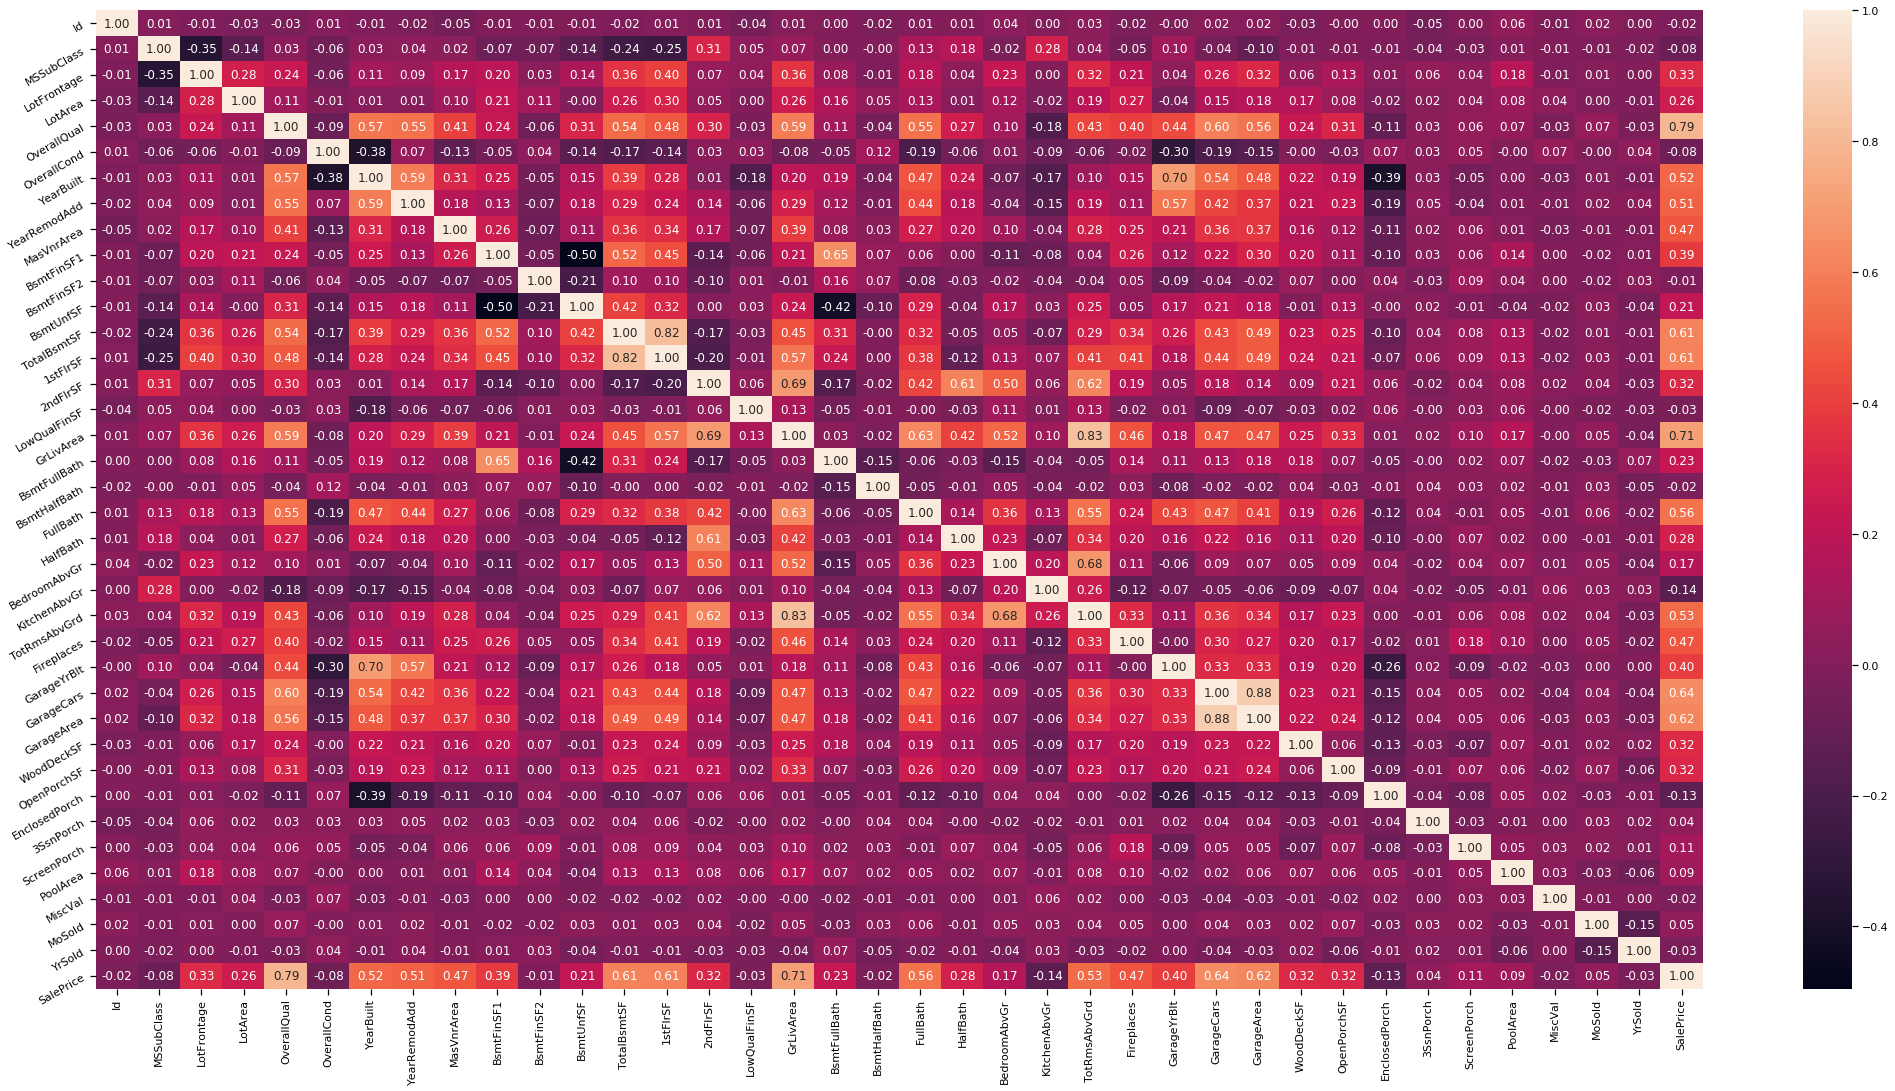

In [52]:
corr = train_df.corr()
sns.set_context('notebook',font_scale = 1.0, rc = {'lines.linewidth':2.5})
plt.figure(figsize=(36,18))
a = sns.heatmap(corr,annot = True, fmt = '.2f')
rotx = a.set_xticklabels(a.get_xticklabels(),rotation = 90)
roty = a.set_yticklabels(a.get_yticklabels(),rotation = 30)

## Encoding

In [53]:
object_nunique = list(map(lambda col:all_dt[col].nunique(),obj_cols))
d = dict(zip(obj_cols,object_nunique))
sorted(d.items(),key = lambda x:x[1])

[('Street', 2),
 ('Alley', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),
 ('GarageFinish', 3),
 ('PavedDrive', 3),
 ('PoolQC', 3),
 ('LotShape', 4),
 ('LandContour', 4),
 ('MasVnrType', 4),
 ('ExterQual', 4),
 ('BsmtQual', 4),
 ('BsmtCond', 4),
 ('BsmtExposure', 4),
 ('KitchenQual', 4),
 ('Fence', 4),
 ('MiscFeature', 4),
 ('MSZoning', 5),
 ('LotConfig', 5),
 ('BldgType', 5),
 ('ExterCond', 5),
 ('HeatingQC', 5),
 ('Electrical', 5),
 ('FireplaceQu', 5),
 ('GarageQual', 5),
 ('GarageCond', 5),
 ('RoofStyle', 6),
 ('Foundation', 6),
 ('BsmtFinType1', 6),
 ('BsmtFinType2', 6),
 ('Heating', 6),
 ('GarageType', 6),
 ('SaleCondition', 6),
 ('Functional', 7),
 ('Condition2', 8),
 ('HouseStyle', 8),
 ('RoofMatl', 8),
 ('Condition1', 9),
 ('SaleType', 9),
 ('Exterior1st', 15),
 ('Exterior2nd', 16),
 ('Neighborhood', 25)]

In [54]:
# Cols that will be encoded
low_cols = [col for col in obj_cols if all_dt[col].nunique() < 10]
high_cols = list(set(obj_cols) - set(low_cols))
high_cols

['Neighborhood', 'Exterior2nd', 'Exterior1st']

In [55]:
for col in high_cols:
    all_dt.drop(element,axis = 1)
    

In [56]:
# Manual Encoding
cat_qual_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','GarageQual','PoolQC']
all_dt[cat_qual_features].head()

ExterQual ExterCond BsmtQual BsmtCond HeatingQC KitchenQual FireplaceQu  \
0        Gd        TA       Gd       TA        Ex          Gd          Gd   
1        TA        TA       Gd       TA        Ex          TA          TA   
2        Gd        TA       Gd       TA        Ex          Gd          TA   
3        TA        TA       TA       Gd        Gd          Gd          Gd   
4        Gd        TA       Gd       TA        Ex          Gd          TA   

  GarageQual GarageCond GarageQual PoolQC  
0         TA         TA         TA     Ex  
1         TA         TA         TA     Ex  
2         TA         TA         TA     Ex  
3         TA         TA         TA     Ex  
4         TA         TA         TA     Ex

In [65]:
len(cat_qual_features)

11

In [69]:
all_dt[cat_qual_features[0]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[1]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[2]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[3]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[4]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[5]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[6]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[7]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[8]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[9]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)
all_dt[cat_qual_features[10]].replace({'Ex':9, 'Gd':7, 'TA':5, 'Fa':3, 'Po':1},inplace = True)

In [71]:
all_dt[cat_qual_features].head()

ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          7          5         7         5          9            7   
1          5          5         7         5          9            5   
2          7          5         7         5          9            7   
3          5          5         5         7          7            7   
4          7          5         7         5          9            7   

   FireplaceQu  GarageQual  GarageCond  GarageQual  PoolQC  
0            7           5           5           5       9  
1            5           5           5           5       9  
2            5           5           5           5       9  
3            7           5           5           5       9  
4            5           5           5           5       9

In [72]:
all_dt['CentralAir'].replace({'N':0,'Y':1},inplace = True)
all_dt['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [73]:
# Remaining categorical data
remain_cat_cols = all_dt.dtypes == 'object'
cat_remain_cols = list(remain_cat_cols[remain_cat_cols].index)
cat_remain_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [74]:
len(cat_remain_cols)

32

In [75]:
miss_col=[]
all_cols = list(all_dt.columns)
for col in all_cols:
    if all_dt[col].isna().sum() > 0:
        miss_col.append(col)
miss_col

[]

In [77]:
OHE = OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_all = pd.DataFrame(OHE.fit_transform(all_dt[cat_remain_cols]))
OHE_all.index = all_dt.index
num_all_data = all_dt.drop(cat_remain_cols,axis = 1)
OHE_df = pd.concat([num_all_data,OHE_all],axis = 1)
OHE_df.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  ExterQual  ...  196  197  198  199  200  201  \
0          2003       196.0          7  ...  0.0  0.0  0.0  1.0  0.0  0.0   
1          1976         0.0          5  ...  0.0  0.0  0.0  1.0  0.0  0.0   
2          2002       162.0          7  ...  0.0  0.0  0.0  1.0  0.0  0.0   
3          1970         0.0          5  ...  0.0  0.0  0.0  1.0  1.0  0.0   
4          2000       350.0          7  ...  0.0  0.0  0.0  1.0  0.0  0.0   

   202  203  204  205  
0  0.0  0.0  1.0  0.0  
1  0.0  0.0  1.0  0.0  
2  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  
4  0.0  0.0  1.0  0.0  

[5 rows x 254 columns]

In [78]:
OHE_df.shape

(2919, 254)

In [80]:
train_df = OHE_df.iloc[:1460,:]
test_df = OHE_df.iloc[1460:,:]
train_df.shape , test_df.shape

((1460, 254), (1459, 254))